In [20]:
import matplotlib.pyplot
import numpy
import math
%matplotlib inline

def draw(data_array):
    image_array = numpy.asfarray(data_array).reshape((28,28))
    matplotlib.pyplot.imshow(image_array , cmap='Greys', interpolation='None')

def number_file_to_data(filename):
    data_file = open(filename, 'r')
    data_list = data_file.readlines()
    data_file.close()
    data = []
    
    for i in range(0, len(data_list)):
        data.append(data_list[i].split(','))
        
    for i in range(0, len(data)):
        for j in range(0, len(data[i])):
            data[i][j] = int(data[i][j])
            
    return data

def get_model_data(train_data):
    model_data = []
    
    for i in range(0, 10):
        model_data.append([0]*784)

    # train model
    for i in range(0, len(train_data)):
        number = train_data[i][0]
        for j in range(1, len(train_data[i])):
            model_data[number][j-1] += train_data[i][j]

    for i in range(0, 10):
        for j in range(0, len(model_data[i])):
            model_data[i][j] /= 6000
            
    return model_data
            
def get_distance(model_data, test_array, target_number):
    square_sum = 0
    for i in range(0, 784):
        square_sum += (model_data[target_number][i] - test_array[i])**2
    return math.sqrt(square_sum)

def get_distance_guess_array(model_data, test_array):
    guess_array = [0]*10
    for i in range(0, 10):
        guess_array[i] = get_distance(model_data, test_array, i)
    return guess_array

def get_angle_guess_array(model_data, test_array):
    guess_array = [0]*10
    for i in range(0, 10):
        guess_array[i] = math.degrees(math.acos(get_cos_angle(model_data, test_array, i)))
        
    return guess_array

def guess_with_distance(model_data, test_array):
    shortest = 0
    shortest_index = 0
    guess_array = get_distance_guess_array(model_data, test_array)
        
    shortest = guess_array[shortest_index]
    for i in range(1, 10):
        if shortest > guess_array[i]:
            shortest = guess_array[i]
            shortest_index = i
            
    return (shortest_index, shortest)


def get_length(vector):
    square_sum = 0
    for i in range(0, len(vector)):
        square_sum += vector[i]**2
    return math.sqrt(square_sum)

def dot(vector_a, vector_b):
    sum = 0
    for i in range(0, len(vector_a)):
        sum += vector_a[i] * vector_b[i]
    return sum

def get_cos_angle(model_data, test_array, target_number):
    vector_a = model_data[target_number]
    vector_b = test_array
    length_a = get_length(vector_a)
    length_b = get_length(vector_b)
    a_dot_b = dot(vector_a, vector_b)
    return a_dot_b / (length_a * length_b)

def guess_with_angle(model_data, test_array):
    guess_array = get_angle_guess_array(model_data, test_array)
    smallest_angle = guess_array[0]
    smallest_index = 0
    for i in range(1, 10):
        if smallest_angle > guess_array[i]:
            smallest_angle = guess_array[i]
            smallest_index = i
    
    return (smallest_index, smallest_angle)

def get_accuracy_distance(model_data, test_data):
    num_correct = 0
    for i in range(0, len(test_data)):
        if guess_with_distance(model_data, test_data[i][1:])[0] == test_data[i][0]:
            num_correct += 1
    return num_correct / len(test_data)

def get_accuracy_angle(model_data, test_data):
    num_correct = 0
    for i in range(0, len(test_data)):
        if guess_with_angle(model_data, test_data[i][1:]) == test_data[i][0]:
            num_correct += 1
    return num_correct / len(test_data)

def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)

        
def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark


def get_correct_and_wrong_guess_distance(model_data, train_data):
    wrong_guess_distance = []
    correct_guess_distance = []
    for i in range(0, len(train_data)):
        guess = guess_with_distance(model_data, train_data[i][1:])
        if train_data[i][0] != guess[0]:
            wrong_guess_distance.append(guess[1])
        else:
            correct_guess_distance.append(guess[1])
    return (correct_guess_distance, wrong_guess_distance)        
    
def get_correct_and_wrong_guess_angle(model_data, train_data):
    wrong_guess_angle = []
    correct_guess_angle = []
    for i in range(0, len(train_data)):
        
        guess = guess_with_angle(model_data, train_data[i][1:])
        if train_data[i][0] != guess[0]:
            wrong_guess_angle.append(guess[1])
        else:
            correct_guess_angle.append(guess[1])
    return (correct_guess_angle, wrong_guess_angle)

def get_histogram_info(li):
    quickSort(li)    
    sum = 0
    n = len(li)
    for i in range(0, n):
        sum += li[i]
    avg = sum / n
    min = li[0]
    max = li[n - 1]
    if n % 4 == 0 or n % 4 == 1:
        first_quartile = (li[int(n/4)-1] + li[int(n/4)]) / 2
    else:
        first_quartile = li[int(n/4)]
    if n % 4 == 0:
        third_quartile = (li[int(3*n/4)-1] + li[int(3*n/4)]) / 2
    elif n % 4 == 1:
        third_quartile = (li[int(3*n/4)] + li[int(3*n/4)+1]) / 2
    else:
        third_quartile = li[int(3*n/4)]
    return (min, first_quartile, avg, third_quartile, max)


def get_certainty(correct_histogram, wrong_histogram, data):
    
    min_c = correct_histogram[0]
    first_quartile_c = correct_histogram[1]
    avg_c = correct_histogram[2]
    third_quartile_c = correct_histogram[3]
    max_c = correct_histogram[4]
    
    min_w = wrong_histogram[0]
    first_quartile_w = wrong_histogram[1]
    avg_w = wrong_histogram[2]
    third_quartile_w = wrong_histogram[3]
    max_w = wrong_histogram[4]
    
    
    
    if data < 0:
        raise Exception("negtaive value is not allowed")
    
    if data < min_c:
        certainty_c = -0.05/min_c * data + 1
    elif data < first_quartile_c:
        certainty_c = -0.15/(first_quartile_c-min_c) * (data - min_c) + 0.95
    elif data < avg_c:
        certainty_c = -0.2/(avg_c-first_quartile_c) * (data - first_quartile_c) + 0.8
    elif data < third_quartile_c:
        certainty_c = -0.2/(third_quartile_c-avg_c) * (data - avg_c) + 0.6
    elif data < max_c:
        certainty_c = -0.35/(max_c-third_quartile_c) * (data - third_quartile_c) + 0.4
    elif data < max_c*2:
        certainty_c = -0.05/max_c * (data - max_c) + 0.05
    else:
        certainty_c = 0
        
    if data < min_w:
        certainty_w = -0.05/min_w * data + 1
    elif data < first_quartile_w:
        certainty_w = -0.15/(first_quartile_w-min_w) * (data - min_w) + 0.95
    elif data < avg_w:
        certainty_w = -0.2/(avg_w-first_quartile_w) * (data - first_quartile_w) + 0.8
    elif data < third_quartile_w:
        certainty_w = -0.2/(third_quartile_w-avg_w) * (data - avg_w) + 0.6
    elif data < max_w:
        certainty_w = -0.35/(max_w-third_quartile_w) * (data - third_quartile_w) + 0.4
    elif data < max_w*2:
        certainty_w = -0.05/max_w * (data - max_w) + 0.05
    else:
        certainty_w = 0
        
    return certainty_c - (1 - certainty_w)

def guess(model_data, test_array, c_w_distance_histogram, c_w_angle_histogram):
    distance_guess = guess_with_distance(model_data, test_array)
    angle_guess = guess_with_angle(model_data, test_array)
    distance_certainty = get_certainty(c_w_distance_histogram[0], c_w_distance_histogram[1], distance_guess[1])
    angle_certainty = get_certainty(c_w_angle_histogram[0], c_w_angle_histogram[1], angle_guess[1])
    if distance_certainty > angle_certainty:
        return distance_guess[0]
    else:
        return angle_guess[0]

def get_accuracy(model_data, test_data, c_w_distance_histogram, c_w_angle_histogram):
    num_correct = 0
    for i in range(0, len(test_data)):
        
        if guess(model_data, test_data[i][1:], c_w_distance_histogram, c_w_angle_histogram) == test_data[i][0]:
            num_correct += 1
    return num_correct / len(test_data)


In [21]:
import random
from math import e

class Matrix():
    def __init__(self, row=0, col=0, val=None, data=None):
        if data != None:
            self.row = len(data)
            self.col = len(data[0])
            self.data = [[val]*self.col for _ in range(self.row)]
            for i in range(self.row):
                for j in range(self.col):
                    self.data[i][j] = data[i][j] 
        else:
            self.row = row
            self.col = col
            if val != None:
                self.data = [[val]*self.col for _ in range(self.row)]
            else:
                self.data = [[0]*self.col for _ in range(self.row)]
            
    def randomize(self):
        for i in range(self.row):
            for j in range(self.col):
                self.data[i][j] = random.uniform(-1, 1)
                
    def get_col(self, col):
        m = Matrix(self.row, 1)
        for i in range(m.row):
            m.data[i][0] = self.data[i][col]
        return m
                
    def get_row_sum(self, row):
        s = 0
        for i in range(self.col):
            s += self.data[row][i]
        return s
            
    def dot(self, m):
        if self.col != 1 or m.col != 1 or self.row != m.row:
            raise Exception("Cannot take dot products. Two operands should be an equal size vectors")
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[i][j] = self.data[i][j] * m.data[i][j]
        return matrix
                
    def identity(self):
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                if i == j:
                    matrix.data[i][j] = 1
                else:
                    matrix.data[i][j] = 0
        return matrix
       
    def transpose(self):
        matrix = Matrix(self.col, self.row)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[j][i] = self.data[i][j]
        return matrix
    
    def transform(self, f, row=None, col=None):
        matrix = Matrix(self.row, self.col)
        if row != None:
            for i in range(self.row):
                for j in range(self.col):
                    if i == row:
                        matrix.data[i][j] = f(self.data[i][j])
                    else:
                        matrix.data[i][j] = self.data[i][j]
                
        elif col != None:
            for i in range(self.row):
                for j in range(self.col):
                    if j == col:
                        matrix.data[i][j] = f(self.data[i][j])
                    else:
                        matrix.data[i][j] = self.data[i][j]
                        
        else:
            for i in range(self.row):
                for j in range(self.col):
                    matrix.data[i][j] = f(self.data[i][j])
        
        return matrix
    
    def mul(self, m):
        if self.col != m.row:
            raise Exception("Number of columns of left matrix does not match number of rows of right matrix")
        matrix = Matrix(self.row, m.col)
        for i in range(matrix.row):
            for j in range(matrix.col):
                for k in range(self.col):
                    matrix.data[i][j] += self.data[i][k] * m.data[k][j]
        return matrix
    
    def scale(self, s, row=-1, col=-1):
        matrix = Matrix(self.row, self.col)
        if row != -1:
            for i in range(matrix.col):
                matrix.data[row][i] = self.data[row][i] * s
        elif col != -1:
            for i in range(matrix.row):
                matrix.data[i][col] = self.data[i][col] * s
        else:
            for i in range(matrix.row):
                for j in range(matrix.col):
                    matrix.data[i][j] = self.data[i][j] * s
        return matrix
        
    def add(self, m):
        if self.row != m.row or self.col != m.col:
            raise Exception("Number of rows and columns should match")
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[i][j] = self.data[i][j] + m.data[i][j]
        return matrix
    
    def sub(self, m):
        if self.row != m.row or self.col != m.col:
            raise Exception("Number of rows and columns should match")
        matrix = Matrix(self.row, self.col)
        for i in range(self.row):
            for j in range(self.col):
                matrix.data[i][j] = self.data[i][j] - m.data[i][j]
        return matrix
      
    def show(self):
        for i in range(self.row):
            print()
            for j in range(self.col):
                print(str(self.data[i][j]) + " ", end="")
                
# Single layer neural network
class SingleLayerNeuralNetwork():
    def __init__(self, input_layer, output_layer, alpha=1):
        self.num_input = input_layer
        self.num_output = output_layer
        self.alpha = alpha
        self.w = Matrix(output_layer, input_layer, 0.5)
        
    def sigmoid(self, x):
        return 1 / (1 + e**(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
        
    def train(self, input_data, output_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        output_m_list = [Matrix(data=[x]).transpose() for x in output_data]
        
        self.w.randomize()
        
        for _ in range(10000):
            
            for i in range(len(input_data)):
                
                
                
                input_m = input_m_list[i]
                desired_output_m = output_m_list[i]
                output_m = self.w.mul(input_m).transform(self.sigmoid)
                
                error_m = desired_output_m.sub(output_m)
                
                sigmoid_gradient_output_m = output_m.transform(self.sigmoid_derivative)
                
                error_m_dot_sigmoid_gradient_output_m = error_m.dot(sigmoid_gradient_output_m)
                
                alpha_dot_error_m_dot_sigmoid_gradient_output_m = error_m_dot_sigmoid_gradient_output_m.scale(self.alpha)
                
                adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(input_m.transpose())
                
                self.w = self.w.add(adjustment_m)
                
    def test(self, input_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        for i in range(len(input_m_list)):
            input_m = input_m_list[i]
            
            output_m = self.w.mul(input_m).transform(self.sigmoid)

            print(output_m.data)
            
# Multi-layered neural network
class MultiLayeredNeuralNetwork():
    def __init__(self, input_layer, hidden_layer, output_layer, alpha=0.1):
        self.num_input = input_layer
        self.num_hidden = hidden_layer
        self.num_output = output_layer
        self.alpha = alpha
        self.w0 = Matrix(hidden_layer, input_layer)
        self.w1 = Matrix(output_layer, hidden_layer)
        self.w0_history = []
        self.w1_history = []
        self.max_w = 0
        
    def sigmoid(self, x):
        return 1 / (1 + e**(-x))
        
        
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, input_data, output_data):
        
        self.w0.randomize()
        self.w1.randomize()
        
        self.w0_history = [self.w0]
        self.w1_history = [self.w1]
        
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        output_m_list = [Matrix(data=[x]).transpose() for x in output_data]
        
        for _ in range(60000):
            for i in range(len(input_m_list)):

                input_m = input_m_list[i]
                desired_output_m = output_m_list[i]
                
                hidden_output = self.w0.mul(input_m).transform(self.sigmoid)
                
                output_m = self.w1.mul(hidden_output).transform(self.sigmoid)
                
                error_m = desired_output_m.sub(output_m)
                
                sigmoid_gradient_output_m = output_m.transform(self.sigmoid_derivative)
                
                error_m_dot_sigmoid_gradient_output_m = error_m.dot(sigmoid_gradient_output_m)
                
                alpha_dot_error_m_dot_sigmoid_gradient_output_m = error_m_dot_sigmoid_gradient_output_m.scale(self.alpha)
                
                w1_adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(hidden_output.transpose())
                
                w1_transpose = self.w1.transpose()
#                 for i in range(w1_transpose.row):
#                     f = lambda x: x / w1_transpose.get_row_sum(i)
#                     w1_transpose = w1_transpose.transform(f, i)
                
                hidden_error_m = w1_transpose.mul(error_m)
                
                sigmoid_gradient_hidden_output_m = hidden_output.transform(self.sigmoid_derivative)
                
                hidden_error_m_dot_sigmoid_gradient_hidden_output_m = hidden_error_m.dot(sigmoid_gradient_hidden_output_m)
                
                alpha_hidden_error_m_dot_sigmoid_gradient_hidden_output_m = hidden_error_m_dot_sigmoid_gradient_hidden_output_m.scale(self.alpha)
                
                w0_adjustment_m = alpha_hidden_error_m_dot_sigmoid_gradient_hidden_output_m.mul(input_m.transpose())
                
                self.w1 = self.w1.add(w1_adjustment_m)
                self.w0 = self.w0.add(w0_adjustment_m)
                
                for i in range(self.w1.row):
                    for j in range(self.w1.col):
                        if self.w1.data[i][j] > self.max_w:
                            self.max_w = self.w1.data[i][j]
                            
                for i in range(self.w0.row):
                    for j in range(self.w0.col):
                        if self.w0.data[i][j] > self.max_w:
                            self.max_w = self.w0.data[i][j]
                
                self.w0_history.append(self.w1)
                self.w1_history.append(self.w0)
                
    def test(self, input_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        
        for i in range(len(input_m_list)):
            input_m = input_m_list[i]
            
            hidden_output_m = self.w0.mul(input_m).transform(self.sigmoid)
            
            output_m = self.w1.mul(hidden_output_m).transform(self.sigmoid)

            print(output_m.data)
            
class NeuralNetwork():
    def __init__(self, num_layers=3, num_nodes=[1, 1, 1], alpha=0.1):
        # Assuming there is at least one hidden layer
        # num_layers >= 3
        # len(num_nodes) == num_layers is True
        # num_nodes[i] is positive integers
        self.num_layers = num_layers
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.weights = [Matrix(num_nodes[i+1], num_nodes[i]) for i in range(num_layers-1)]

    def sigmoid(self, x):
        return 1 / (1 + e**(-x))
           
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, input_data, output_data, learning_count=60000):
        
        for i in range(len(self.weights)):
            self.weights[i].randomize()
            
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        output_m_list = [Matrix(data=[x]).transpose() for x in output_data]
        
        for _ in range(learning_count):
            print("_", _)
            for i in range(len(input_m_list)):
                
                if i % 100 == 0:
                    print("i", i)
                
                input_m = input_m_list[i]
                desired_output_m = output_m_list[i]
                
                outputs_m = self.get_outputs_m(input_m)
                
                final_output_m = outputs_m[len(outputs_m)-1]
                final_output_error_m = desired_output_m.sub(final_output_m)
                
                errors_m = [None]*len(outputs_m)
                errors_m[len(outputs_m)-1] = final_output_error_m
                for j in range(len(outputs_m)-2, -1, -1):
                    errors_m[j] = self.weights[j+1].transpose().mul(errors_m[j+1])
                    
                for j in range(len(errors_m)):
                    output_m = outputs_m[j]
                    sigmoid_gradient_output_m = output_m.transform(self.sigmoid_derivative)
                    error_m = errors_m[j]
                    error_m_dot_sigmoid_gradient_output_m = error_m.dot(sigmoid_gradient_output_m)
                    alpha_dot_error_m_dot_sigmoid_gradient_output_m = error_m_dot_sigmoid_gradient_output_m.scale(self.alpha)
                    if j == 0:
                        w_adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(input_m.transpose())
                    else:
                        w_adjustment_m = alpha_dot_error_m_dot_sigmoid_gradient_output_m.mul(outputs_m[j-1].transpose())
                        
                    self.weights[j] = self.weights[j].add(w_adjustment_m)
                                
    def get_outputs_m(self, input_m):
        hidden_outputs = []
        hidden_outputs.append(self.weights[0].mul(input_m).transform(self.sigmoid))
        
        for i in range(1, len(self.weights)):
            hidden_outputs.append(self.weights[i].mul(hidden_outputs[i-1]).transform(self.sigmoid))
            
        return hidden_outputs
                
                
    def test(self, input_data):
        input_m_list = [Matrix(data=[x]).transpose() for x in input_data]
        final_outputs_m = []
        for i in range(len(input_m_list)):
            input_m = input_m_list[i]
            
            outputs_m = self.get_outputs_m(input_m)
            final_output_m = outputs_m[len(outputs_m)-1]
            final_outputs_m.append(final_output_m)
        return final_outputs_m
            

In [22]:
train_data = number_file_to_data('mnist_train.csv')
test_data = number_file_to_data('mnist_test.csv')

In [23]:
train_inputs = []
train_outputs = []

for i in range(len(train_data)):
    data = []
    for j in range(1, len(train_data[i])):
        data.append(train_data[i][j] / 255)
    train_inputs.append(data)
    output_data = [0]*10
    output_data[train_data[i][0]] = 1
    train_outputs.append(output_data)

In [15]:
len(train_outputs)

60000

In [24]:
neural_network = NeuralNetwork(3, [784, 100, 10])
neural_network.train(train_inputs, train_outputs, learning_count=1) # this takes 2 hours

_ 0
i 0
i 100
i 200
i 300
i 400
i 500
i 600
i 700
i 800
i 900
i 1000
i 1100
i 1200
i 1300
i 1400
i 1500
i 1600
i 1700
i 1800
i 1900
i 2000
i 2100
i 2200
i 2300
i 2400
i 2500
i 2600
i 2700
i 2800
i 2900
i 3000
i 3100
i 3200
i 3300
i 3400
i 3500
i 3600
i 3700
i 3800
i 3900
i 4000
i 4100
i 4200
i 4300
i 4400
i 4500
i 4600
i 4700
i 4800
i 4900
i 5000
i 5100
i 5200
i 5300
i 5400
i 5500
i 5600
i 5700
i 5800
i 5900
i 6000
i 6100
i 6200
i 6300
i 6400
i 6500
i 6600
i 6700
i 6800
i 6900
i 7000
i 7100
i 7200
i 7300
i 7400
i 7500
i 7600
i 7700
i 7800
i 7900
i 8000
i 8100
i 8200
i 8300
i 8400
i 8500
i 8600
i 8700
i 8800
i 8900
i 9000
i 9100
i 9200
i 9300
i 9400
i 9500
i 9600
i 9700
i 9800
i 9900
i 10000
i 10100
i 10200
i 10300
i 10400
i 10500
i 10600
i 10700
i 10800
i 10900
i 11000
i 11100
i 11200
i 11300
i 11400
i 11500
i 11600
i 11700
i 11800
i 11900
i 12000
i 12100
i 12200
i 12300
i 12400
i 12500
i 12600
i 12700
i 12800
i 12900
i 13000
i 13100
i 13200
i 13300
i 13400
i 13500
i 13600
i 13700
i 13

In [25]:
test_inputs = []
test_outputs = []
for i in range(len(test_data)):
    data = []
    for j in range(1, len(test_data[i])):
        data.append(test_data[i][j] / 255)
    test_inputs.append(data)
    test_outputs.append(test_data[i][0])
    
outputs_m = neural_network.test(test_inputs)

In [26]:
count = 0
for i in range(len(outputs_m)):
    max_probability = 0
    max_index = -1
    for r in range(outputs_m[i].row):
        for c in range(outputs_m[i].col):
            if outputs_m[i].data[r][c] > max_probability:
                max_index = r
                max_probability = outputs_m[i].data[r][c]
    if max_index == test_outputs[i]:
        count += 1

print(str(count/len(outputs_m)))

0.9462


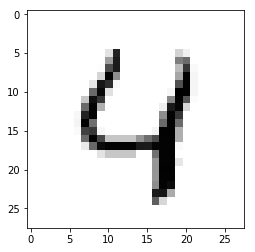

In [37]:
draw(test_inputs[4])

In [38]:
outputs_m[4].data

[[4.190388469820384e-05],
 [0.0006229585049630999],
 [0.005178662099047205],
 [0.0003853832936529919],
 [0.9849741160795397],
 [0.0025131630907343776],
 [0.006857748732014358],
 [0.00143578287346201],
 [0.0075041618448900725],
 [0.10807733064397669]]

In [34]:
test_outputs[2]

1

In [9]:
get_accuracy_distance(model_data, test_data)

0.8155

In [10]:
get_accuracy_angle(model_data, test_data)

0.8216

In [13]:
# this takes very long time
c_w_distance = get_correct_and_wrong_guess_distance(model_data, train_data)
c_w_angle = get_correct_and_wrong_guess_angle(model_data, train_data)

In [14]:
c_w_distance_histogram = (get_histogram_info(c_w_distance[0]), get_histogram_info(c_w_distance[1]))
c_w_angle_histogram = (get_histogram_info(c_w_angle[0]), get_histogram_info(c_w_angle[1]))

In [32]:
print("min, first-quartile, avg, third-quartile, max")
print("correct_distance_histogram")
print(c_w_distance_histogram[0])
print("wrong_distance_histogram")
print(c_w_distance_histogram[1])
print("correct_angle_histogram")
print(c_w_angle_histogram[0])
print("correct_angle_histogram")
print(c_w_angle_histogram[1])

min, first-quartile, avg, third-quartile, max
correct_distance_histogram
(800.3120043352023, 1408.8013714947633, 1571.328485128993, 1749.2583560481423, 2856.0248600736954)
wrong_distance_histogram
(1045.542220229785, 1566.721306610914, 1735.4041039290962, 1883.224008347484, 2772.0574469803064)
correct_angle_histogram
(17.116163641315005, 36.01920187808983, 41.07441084389979, 46.0421764872881, 68.91813744527443)
correct_angle_histogram
(26.648727629495028, 43.20614806687715, 47.83923349205904, 52.184786478955246, 70.60578555318943)


In [46]:
get_certainty(c_w_distance_histogram[0], c_w_distance_histogram[1], 1200)

0.7570177376577703

In [47]:
get_certainty(c_w_angle_histogram[0], c_w_angle_histogram[1], 20)

0.8895908447624279

In [36]:
get_accuracy(model_data, test_data, c_w_distance_histogram, c_w_angle_histogram)

0.8203